In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [25]:
data = pd.read_csv("diabetes.csv")
display(data.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [26]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [27]:
print("Number of missing data in SkinThickness: ", (data['SkinThickness'] == 0).sum())
print("Number of missing data in Insulin: ", (data['Insulin'] == 0).sum())

Number of missing data in SkinThickness:  227
Number of missing data in Insulin:  374


In [28]:
data.loc[data['SkinThickness'] == 0, 'SkinThickness'] = data['SkinThickness'].mean()
data.loc[data['Insulin'] == 0, 'Insulin'] = data['Insulin'].mean()

In [29]:
print("Number of missing data in SkinThickness: ", (data['SkinThickness'] == 0).sum())
print("Number of missing data in Insulin: ", (data['Insulin'] == 0).sum())

Number of missing data in SkinThickness:  0
Number of missing data in Insulin:  0


In [30]:
num_records = len(data)
num_true = len(data.loc[data['Outcome'] == 1])

print("Number of True cases: {0} ({1:2.2f}%)".format(num_true, (num_true/num_records) * 100))

Number of True cases: 268 (34.90%)


Preparing Data

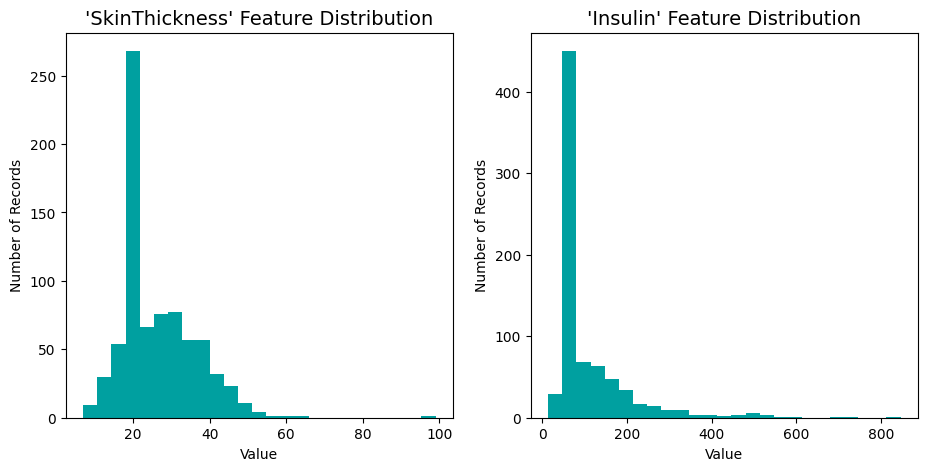

In [31]:
outcome = data['Outcome']
features = data.drop('Outcome', axis=1)

fig = plt.figure(figsize = (11,5));

for i, feature in enumerate(['SkinThickness','Insulin']):
    ax = fig.add_subplot(1, 2, i+1)
    ax.hist(data[feature], bins = 25, color = '#00A0A0')
    ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
    ax.set_xlabel("Value")
    ax.set_ylabel("Number of Records")

In [32]:
def distribution(data, transformed = False):
    """
    Visualization code for displaying skewed distributions of features
    """
    
    # Create figure
    fig = plt.figure(figsize = (11,5));

    # Skewed feature plotting
    for i, feature in enumerate(['SkinThickness','Insulin']):
        ax = fig.add_subplot(1, 2, i+1)
        ax.hist(data[feature], bins = 25, color = '#00A0A0')
        ax.set_title("'%s' Feature Distribution"%(feature), fontsize = 14)
        ax.set_xlabel("Value")
        ax.set_ylabel("Number of Records")

    # Plot aesthetics
    if transformed:
        fig.suptitle("Log-transformed Distributions", \
            fontsize = 16, y = 1.03)
    else:
        fig.suptitle("Skewed Distributions", \
            fontsize = 16, y = 1.03)

    fig.tight_layout()
    fig.show()

/tmp/ipykernel_57019/2740650794.py:26: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


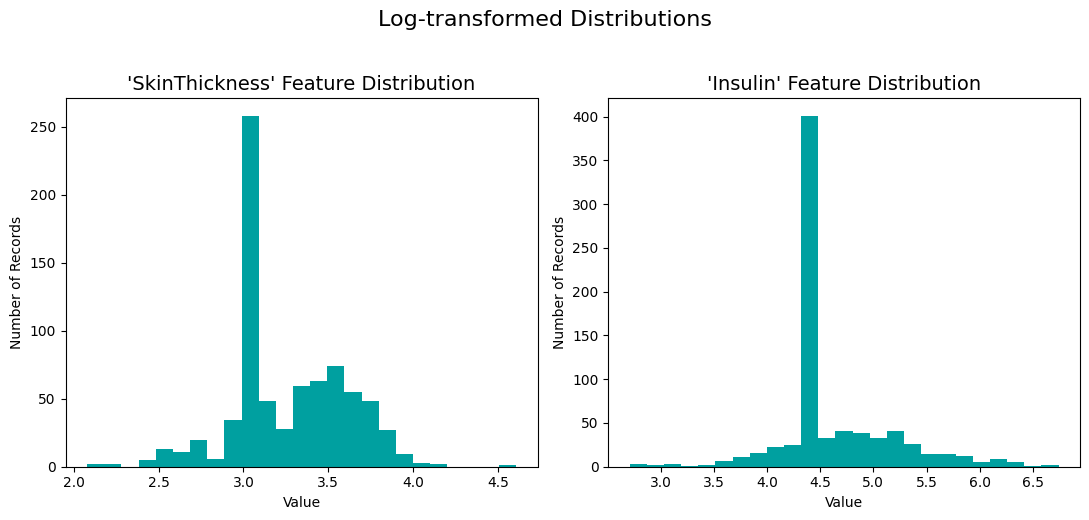

In [33]:
skewed = ['SkinThickness','Insulin']
features_log_transformed = pd.DataFrame(data = features)
features_log_transformed[skewed] = features[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
distribution(features_log_transformed, transformed = True)

In [34]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # default=(0, 1)
numerical = ['Insulin','SkinThickness', 'DiabetesPedigreeFunction']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

display(features_log_minmax_transform.head(n = 5))
features_final = features_log_minmax_transform

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0.595502,0.417468,33.6,0.234415,50
1,1,85,66,0.523317,0.417468,26.6,0.116567,31
2,8,183,64,0.392087,0.417468,23.3,0.253629,32
3,1,89,66,0.434968,0.457607,28.1,0.038002,21
4,0,137,40,0.595502,0.600411,43.1,0.943638,33


Training and Testing

In [35]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    outcome, 
                                                    test_size = 0.2, 
                                                    random_state = 42)

print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 614 samples.
Testing set has 154 samples.


In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, fbeta_score, accuracy_score

clf = RandomForestClassifier(random_state=42)

predictions = clf.fit(X_train, y_train).predict(X_test)
print("Random Forest")
print("Unoptimized model accuracy: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Unoptimized model F-score: {:.4f}".format(fbeta_score(y_test, predictions, beta=0.5)))

Random Forest
Unoptimized model accuracy: 0.7468
Unoptimized model F-score: 0.6452


In [37]:

from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators':[5,10,15,20,25],'max_depth': [2, 4, 6, 8, 10]}

scorer = make_scorer(fbeta_score, beta=0.5)
acc_scorer = make_scorer(accuracy_score)

grid_obj = GridSearchCV(clf, parameters, scoring=scorer)
grid_fit = grid_obj.fit(X_train, y_train)

best_clf = grid_fit.best_estimator_
best_predictions = best_clf.predict(X_test)

print("Random Forest")
print("Optimized model accuracy: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Optimized model F-score: {:.4f}".format(fbeta_score(y_test, best_predictions, beta=0.5)))

Random Forest
Optimized model accuracy: 0.7792
Optimized model F-score: 0.6909
